## Import libraries

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import plot_importance
import lightgbm as lgb
import catboost as cb
import time

In [ ]:
!pip install catboost


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import plot_importance
import lightgbm as lgb
import catboost as cb
import time

In [ ]:
!pip install catboost


### Load data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Replace 'path_to_your_dataset.csv' with the actual file path
dataset_path = '/content/drive/My Drive/dataset.csv'
df = pd.read_csv(dataset_path)

# Display the first few rows
df.head()


,Seq,sMeanPktSz,sTtl,dDSb,AckDat,Offset,SrcWin,State,SrcTCPBase,Proto,TcpRtt,TotBytes,sHops,SrcBytes,SynAck,DstWin,Cause,Label
0,0.000233,0.070402,0.227451,1.0,0.0,0.000108,0.000000,0.2,0.000000,0.000000,0.0,0.000025,0.214286,0.000126,0.0,0.0,0.5,0
1,0.000255,0.070402,0.227451,1.0,0.0,0.000115,0.000000,0.2,0.000000,0.000000,0.0,0.000025,0.214286,0.000126,0.0,0.0,0.5,0
2,0.000496,0.041667,0.211765,1.0,0.0,0.000217,0.000002,0.6,0.388566,0.833333,0.0,0.000007,0.357143,0.000075,0.0,0.0,0.5,4
3,0.000838,0.041667,0.184314,1.0,0.0,0.000333,0.000000,0.6,0.388582,0.833333,0.0,0.000007,0.607143,0.000075,0.0,0.0,0.5,4
4,0.000969,0.041667,0.223529,1.0,0.0,0.000377,0.000000,0.6,0.388582,0.833333,0.0,0.000007,0.250000,0.000075,0.0,0.0,0.5,4


In [ ]:
# print the class distribution of the last column
df['Label'].value_counts()

,count
Label,
0,19130
7,18351
1,5587
5,2848
4,856
6,790
8,647
3,386
2,41


### Data pre-processing

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
# Import the train_test_split function
from sklearn.model_selection import train_test_split
# Encode the dataset
labelencoder = LabelEncoder()
df.iloc[:, -1] = labelencoder.fit_transform(df.iloc[:, -1])
X = df.drop(['Label'],axis=1).values
y = df.iloc[:, -1].values.reshape(-1,1)
y=np.ravel(y)

In [ ]:
# Split the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size = 0.2, random_state = 0,stratify = y)

## Machine learning model training

### Training six base learners (for comparison purposes):
decision tree, random forest, extra trees, XGBoost, LightGBM, and CatBoost


### Cross-validation

#### DT

Training time:  1.1825246810913086
Prediction time per sample:  0.0008497093068925958
Cross-Validation scores:  [0.99814958 0.99784101 0.99838075]
Mean of Cross-Validation scores:  0.9981237785083419
Accuracy of DT: 0.998766447368421
Precision of DT: 0.9987695509694834
Recall of DT: 0.998766447368421
F1-score of DT: 0.9987658089549167
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3826
           1       0.99      1.00      1.00      1118
           2       1.00      1.00      1.00         8
           3       0.99      1.00      0.99        77
           4       1.00      0.99      1.00       171
           5       1.00      0.99      0.99       570
           6       1.00      0.99      1.00       158
           7       1.00      1.00      1.00      3671
           8       1.00      1.00      1.00       129

    accuracy                           1.00      9728
   macro avg       1.00      1.00      1.00      9728
weighted avg 

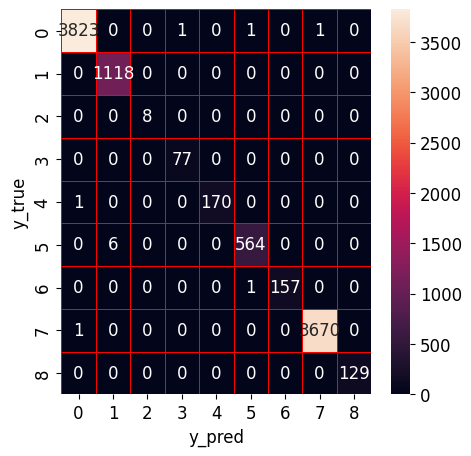

CPU times: user 1.6 s, sys: 36.6 ms, total: 1.64 s
Wall time: 6.69 s


In [ ]:

%%time
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support
import seaborn as sns
import matplotlib.pyplot as plt


# Decision tree training and prediction with 3-fold cross-validation
dt = DecisionTreeClassifier(random_state=0)
dt_scores = cross_val_score(dt, X_train, y_train, cv=3)

# calculate the training time
start = time.time()
dt.fit(X_train, y_train)
end = time.time()
print('Training time: ', end - start)

# calculate the prediction time per sample in milliseconds
start = time.time()
y_predict = dt.predict(X_test)
end = time.time()
print('Prediction time per sample: ', (end - start) / len(X_test)*1000)

y_true = y_test

# Print out the cross-validation scores and mean of them
print('Cross-Validation scores: ', dt_scores)
print('Mean of Cross-Validation scores: ', np.mean(dt_scores))

# Evaluation metrics
dt_score = dt.score(X_test, y_test)
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_predict, average='weighted')

# Print results
print('Accuracy of DT: ' + str(dt_score))
print('Precision of DT: ' + str(precision))
print('Recall of DT: ' + str(recall))
print('F1-score of DT: ' + str(fscore))
print(classification_report(y_true, y_predict))

# Confusion matrix visualization
cm = confusion_matrix(y_true, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


#### RF

Training time:  10.60224962234497
Prediction time:  0.00972484581564602 ms
Cross-Validation scores:  [0.99899769 0.99845786 0.9989205 ]
Mean of Cross-Validation scores:  0.9987920169201695
Accuracy of RF: 0.9989720394736842
Precision of RF: 0.9989726001202657
Recall of RF: 0.9989720394736842
F1-score of RF: 0.9989718720124928
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3826
           1       1.00      1.00      1.00      1118
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00        77
           4       1.00      1.00      1.00       171
           5       0.99      0.99      0.99       570
           6       1.00      0.99      1.00       158
           7       1.00      1.00      1.00      3671
           8       1.00      1.00      1.00       129

    accuracy                           1.00      9728
   macro avg       1.00      1.00      1.00      9728
weighted avg       1.0

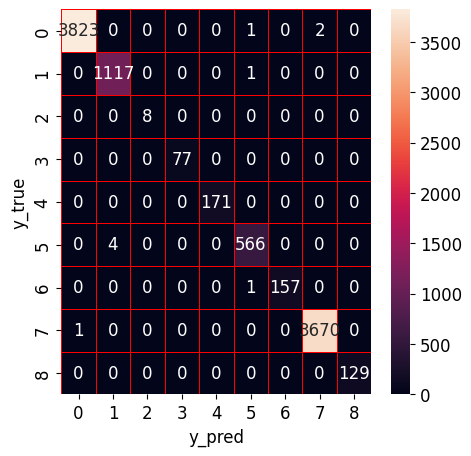

CPU times: user 17.2 s, sys: 144 ms, total: 17.3 s
Wall time: 36.4 s


In [ ]:
%%time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Random Forest training and prediction with 3-fold cross-validation
rf = RandomForestClassifier(random_state=0)
rf_scores = cross_val_score(rf, X_train, y_train, cv=3)

# calculate the training time
start = time.time()
rf.fit(X_train, y_train)
end = time.time()
print('Training time: ', end - start)

# calculate the prediction time per sample in milliseconds
start = time.time()
y_predict = rf.predict(X_test)
end = time.time()
print('Prediction time: ', (end - start) / len(y_predict) * 1000, 'ms')

y_true = y_test

# Print out the cross-validation scores and mean of them
print('Cross-Validation scores: ', rf_scores)
print('Mean of Cross-Validation scores: ', np.mean(rf_scores))

# Evaluation metrics
rf_score = rf.score(X_test, y_test)
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_predict, average='weighted')

# Print results
print('Accuracy of RF: ' + str(rf_score))
print('Precision of RF: ' + str(precision))
print('Recall of RF: ' + str(recall))
print('F1-score of RF: ' + str(fscore))
print(classification_report(y_true, y_predict))

# Confusion matrix visualization
cm = confusion_matrix(y_true, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


#### ET

Training time:  4.4594550132751465
Prediction time:  0.016224325487488193 ms
Cross-Validation scores:  [0.99899769 0.99868918 0.99899761]
Mean of Cross-Validation scores:  0.998894826183284
Accuracy of ET: 0.9991776315789473
Precision of ET: 0.9991778500646348
Recall of ET: 0.9991776315789473
F1-score of ET: 0.9991774273565044
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3826
           1       1.00      1.00      1.00      1118
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00        77
           4       1.00      1.00      1.00       171
           5       1.00      0.99      1.00       570
           6       1.00      0.99      1.00       158
           7       1.00      1.00      1.00      3671
           8       1.00      1.00      1.00       129

    accuracy                           1.00      9728
   macro avg       1.00      1.00      1.00      9728
weighted avg       1.

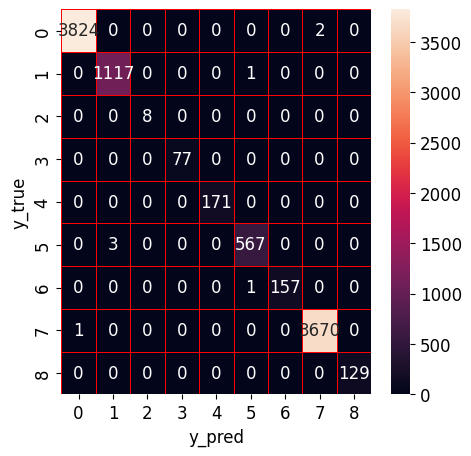

CPU times: user 10.2 s, sys: 66 ms, total: 10.2 s
Wall time: 16 s


In [ ]:
%%time
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Extra Trees training and prediction with 3-fold cross-validation
et = ExtraTreesClassifier(random_state=0)
et_scores = cross_val_score(et, X_train, y_train, cv=3)

# calculate the training time
start = time.time()
et.fit(X_train, y_train)
end = time.time()
print('Training time: ', end - start)

# calculate the prediction time per sample in milliseconds
start = time.time()
y_predict = et.predict(X_test)
end = time.time()
print('Prediction time: ', (end - start) / len(X_test) * 1000, 'ms')


y_true = y_test

# Print out the cross-validation scores and mean of them
print('Cross-Validation scores: ', et_scores)
print('Mean of Cross-Validation scores: ', np.mean(et_scores))

# Evaluation metrics
et_score = et.score(X_test, y_test)
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_predict, average='weighted')

# Print results
print('Accuracy of ET: ' + str(et_score))
print('Precision of ET: ' + str(precision))
print('Recall of ET: ' + str(recall))
print('F1-score of ET: ' + str(fscore))
print(classification_report(y_true, y_predict))

# Confusion matrix visualization
cm = confusion_matrix(y_true, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


#### XGBoost

Training time:  2.8611838817596436
Prediction time per sample:  0.006574377613632302
Cross-Validation scores:  [0.99892059 0.99838075 0.9988434 ]
Mean of Cross-Validation scores:  0.9987149119545077
Accuracy of XGBoost: 0.9988692434210527
Precision of XGBoost: 0.998870514824584
Recall of XGBoost: 0.9988692434210527
F1-score of XGBoost: 0.9988689525290511
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3826
           1       0.99      1.00      1.00      1118
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00        77
           4       1.00      1.00      1.00       171
           5       0.99      0.99      0.99       570
           6       1.00      0.99      1.00       158
           7       1.00      1.00      1.00      3671
           8       1.00      1.00      1.00       129

    accuracy                           1.00      9728
   macro avg       1.00      1.00      1.00    

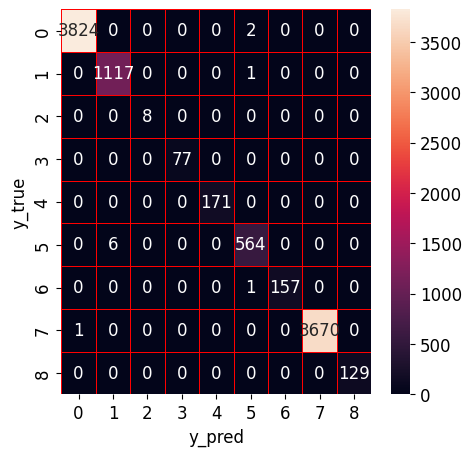

In [ ]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# XGBoost training and prediction with 3-fold cross-validation
xg = xgb.XGBClassifier(random_state=0)
xg_scores = cross_val_score(xg, X_train, y_train, cv=3)

# calculate the training time
start = time.time()
xg.fit(X_train, y_train)
end = time.time()
print('Training time: ', end - start)

# calculate the prediction time per sample in milliseconds
start = time.time()
y_predict = xg.predict(X_test)
end = time.time()
print('Prediction time per sample: ', (end - start) / len(X_test) * 1000)


y_true = y_test

# Print out the cross-validation scores and mean of them
print('Cross-Validation scores: ', xg_scores)
print('Mean of Cross-Validation scores: ', np.mean(xg_scores))

# Evaluation metrics
xg_score = xg.score(X_test, y_test)
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_predict, average='weighted')

# Print results
print('Accuracy of XGBoost: ' + str(xg_score))
print('Precision of XGBoost: ' + str(precision))
print('Recall of XGBoost: ' + str(recall))
print('F1-score of XGBoost: ' + str(fscore))
print(classification_report(y_true, y_predict))

# Confusion matrix visualization
cm = confusion_matrix(y_true, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


#### LightGBM

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006175 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2483
[LightGBM] [Info] Number of data points in the train set: 25938, number of used features: 17
[LightGBM] [Info] Start training from score -0.933125
[LightGBM] [Info] Start training from score -2.164121
[LightGBM] [Info] Start training from score -7.072422
[LightGBM] [Info] Start training from score -4.835588
[LightGBM] [Info] Start training from score -4.040972
[LightGBM] [Info] Start training from score -2.837657
[LightGBM] [Info] Start training from score -4.118459
[LightGBM] [Info] Start training from score -0.974654
[LightGBM] [Info] Start training from score -4.319920
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


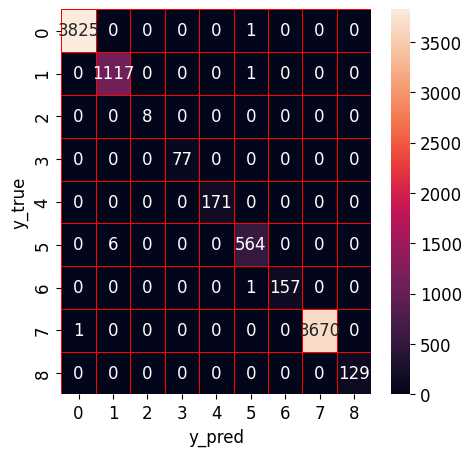

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# LightGBM training and prediction with 3-fold cross-validation
lgbm = lgb.LGBMClassifier(random_state=0)
lgbm_scores = cross_val_score(lgbm, X_train, y_train, cv=3)

# calculate the training time
start = time.time()
lgbm.fit(X_train, y_train)
end = time.time()
print('Training time: ', end - start)

# calculate the prediction time per sample in milliseconds
start = time.time()
y_predict = lgbm.predict(X_test)
end = time.time()
print('Prediction time per sample: ', (end - start) / len(X_test) * 1000)



y_true = y_test

# Print out the cross-validation scores and mean of them
print('Cross-Validation scores: ', lgbm_scores)
print('Mean of Cross-Validation scores: ', np.mean(lgbm_scores))

# Evaluation metrics
lgbm_score = lgbm.score(X_test, y_test)
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_predict, average='weighted')

# Print results
print('Accuracy of LightGBM: ' + str(lgbm_score))
print('Precision of LightGBM: ' + str(precision))
print('Recall of LightGBM: ' + str(recall))
print('F1-score of LightGBM: ' + str(fscore))
print(classification_report(y_true, y_predict))

# Confusion matrix visualization
cm = confusion_matrix(y_true, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


#### Catboost

Training time:  72.09140086174011
Prediction time per sample:  0.01113496622756908
Cross-Validation scores:  [0.99868928 0.99799522 0.99899761]
Mean of Cross-Validation scores:  0.9985607040048587
Accuracy of CatBoost: 0.9986636513157895
Precision of CatBoost: 0.9986673947900101
Recall of CatBoost: 0.9986636513157895
F1-score of CatBoost: 0.9986631309274092
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3826
           1       0.99      1.00      1.00      1118
           2       1.00      1.00      1.00         8
           3       0.99      1.00      0.99        77
           4       1.00      0.99      1.00       171
           5       0.99      0.99      0.99       570
           6       1.00      0.99      1.00       158
           7       1.00      1.00      1.00      3671
           8       0.99      1.00      1.00       129

    accuracy                           1.00      9728
   macro avg       1.00      1.00      1.00 

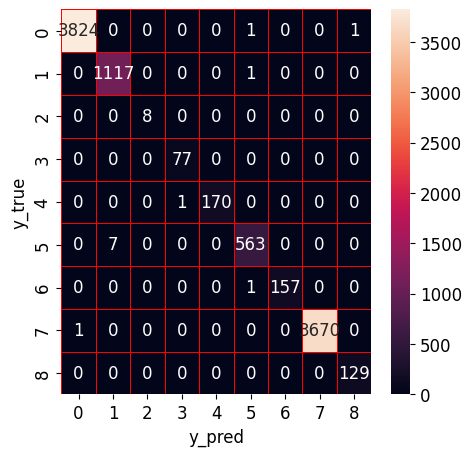

In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# CatBoost training and prediction with 3-fold cross-validation
cat = CatBoostClassifier(random_state=0, verbose=False)
cat_scores = cross_val_score(cat, X_train, y_train, cv=3)


# calculate the training time
start = time.time()
cat.fit(X_train, y_train)
end = time.time()
print('Training time: ', end - start)

# calculate the prediction time per sample in milliseconds
start = time.time()
y_predict = cat.predict(X_test)
end = time.time()
print('Prediction time per sample: ', (end - start) / len(X_test) * 1000)


# Print out the cross-validation scores and mean of them
print('Cross-Validation scores: ', cat_scores)
print('Mean of Cross-Validation scores: ', np.mean(cat_scores))

# Evaluation metrics
cat_score = cat.score(X_test, y_test)
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_predict, average='weighted')

# Print results
print('Accuracy of CatBoost: ' + str(cat_score))
print('Precision of CatBoost: ' + str(precision))
print('Recall of CatBoost: ' + str(recall))
print('F1-score of CatBoost: ' + str(fscore))
print(classification_report(y_true, y_predict))

# Confusion matrix visualization
cm = confusion_matrix(y_true, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


In [ ]:
# record the results
dt_train=dt.predict(X_train)
dt_test=dt.predict(X_test)
dt_prob_train=dt.predict_proba(X_train)
dt_prob_test=dt.predict_proba(X_test)

rf_train=rf.predict(X_train)
rf_test=rf.predict(X_test)
rf_prob_train=rf.predict_proba(X_train)
rf_prob_test=rf.predict_proba(X_test)

et_train=et.predict(X_train)
et_test=et.predict(X_test)
et_prob_train=et.predict_proba(X_train)
et_prob_test=et.predict_proba(X_test)

xg_train=xg.predict(X_train)
xg_test=xg.predict(X_test)
xg_prob_train=xg.predict_proba(X_train)
xg_prob_test=xg.predict_proba(X_test)

lgbm_train=lgbm.predict(X_train)
lgbm_test=lgbm.predict(X_test)
lgbm_prob_train=lgbm.predict_proba(X_train)
lgbm_prob_test=lgbm.predict_proba(X_test)

cat_train=cat.predict(X_train)
cat_test=cat.predict(X_test)
cat_prob_train=cat.predict_proba(X_train)
cat_prob_test=cat.predict_proba(X_test)


## Model selection

In [ ]:
# Calculate the performance of each base model (e.g., accuracy)
base_model_performance = {
    'dt': np.mean(dt_scores),
    'rf': np.mean(rf_scores),
    'et': np.mean(et_scores),
    'xg': np.mean(xg_scores),
    'lgbm': np.mean(lgbm_scores),
    'cat': np.mean(cat_scores)

}

# Rank the base models based on their performance
ranked_models = sorted(base_model_performance, key=base_model_performance.get, reverse=True)

# Select the top-3 performing base models
top_3_models = ranked_models[:3]



In [ ]:
top_3_models

['et', 'rf', 'xg']

## Model Ensemble

In [ ]:
dt_train=dt_train.reshape(-1, 1)
et_train=et_train.reshape(-1, 1)
rf_train=rf_train.reshape(-1, 1)
xg_train=xg_train.reshape(-1, 1)
lgbm_train=lgbm_train.reshape(-1, 1)
cat_train=cat_train.reshape(-1, 1)


dt_test=dt_test.reshape(-1, 1)
et_test=et_test.reshape(-1, 1)
rf_test=rf_test.reshape(-1, 1)
xg_test=xg_test.reshape(-1, 1)
lgbm_test=lgbm_test.reshape(-1, 1)
cat_test=cat_test.reshape(-1, 1)

Training time of Stacking: 1.6525113582611084
Testing time of Stacking: 0.0026289030517402446
Accuracy of Stacking: 0.9986636513157895
Precision of Stacking: 0.9986666102391482
Recall of Stacking: 0.9986636513157895
F1-score of Stacking: 0.9986622131565399
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3826
           1       0.99      1.00      1.00      1118
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00        77
           4       1.00      1.00      1.00       171
           5       1.00      0.99      0.99       570
           6       1.00      0.99      1.00       158
           7       1.00      1.00      1.00      3671
           8       1.00      1.00      1.00       129

    accuracy                           1.00      9728
   macro avg       1.00      1.00      1.00      9728
weighted avg       1.00      1.00      1.00      9728



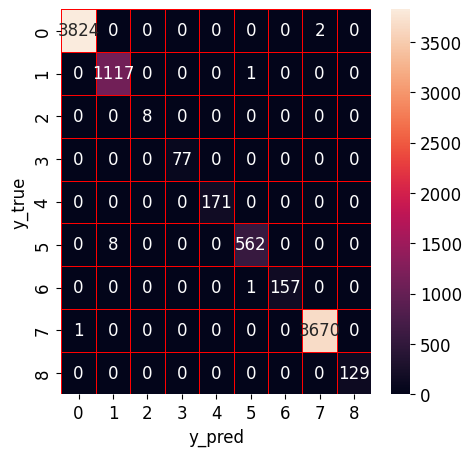

In [ ]:
# Ensemble method 1: traditional stacking

# Get the predictions of the top-3 models
top_3_train_predictions = [globals()[model.lower() + '_train'] for model in top_3_models]
top_3_test_predictions = [globals()[model.lower() + '_test'] for model in top_3_models]

# Stack the predictions of the top-3 models
x_train = np.concatenate(top_3_train_predictions, axis=1)
x_test = np.concatenate(top_3_test_predictions, axis=1)

# Train and evaluate the stacking model
# calcualte the traning time
start_time = time.time()
#stk = lgb.LGBMClassifier().fit(x_train, y_train)
stk =  xgb.XGBClassifier(random_state=0).fit(x_train, y_train)
end_time = time.time()
stk_time = end_time - start_time
print('Training time of Stacking: '+ str(stk_time))

# calcualte the testing time per sample in milliseconds
start_time = time.time()
y_predict=stk.predict(x_test)
end_time = time.time()
stk_time = (end_time - start_time)/len(x_test)*1000
print('Testing time of Stacking: '+ str(stk_time))

y_true=y_test
stk_score=accuracy_score(y_true,y_predict)
print('Accuracy of Stacking: '+ str(stk_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of Stacking: '+(str(precision)))
print('Recall of Stacking: '+(str(recall)))
print('F1-score of Stacking: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


Training time of Stacking: 2.442168951034546
Testing time of Stacking: 0.0024221494401756084
Accuracy of Stacking: 0.9623766447368421
Precision of Stacking: 0.9678756106118096
Recall of Stacking: 0.9623766447368421
F1-score of Stacking: 0.9623710357812174
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      3826
           1       1.00      0.82      0.90      1118
           2       0.19      1.00      0.32         8
           3       0.73      0.94      0.82        77
           4       0.91      0.99      0.95       171
           5       1.00      0.76      0.86       570
           6       1.00      0.99      1.00       158
           7       1.00      1.00      1.00      3671
           8       0.98      0.98      0.98       129

    accuracy                           0.96      9728
   macro avg       0.86      0.94      0.87      9728
weighted avg       0.97      0.96      0.96      9728



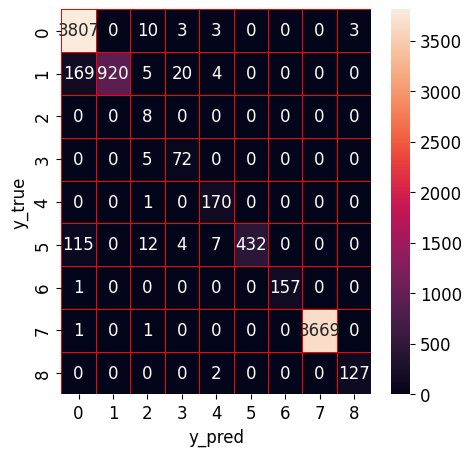

In [ ]:
# Ensemble method 2: confidence-based stacking

# Get the prediction probabilities of the top-3 models
top_3_train_proba = [globals()[model.lower() + '_prob_train'] for model in top_3_models]
top_3_test_proba = [globals()[model.lower() + '_prob_test'] for model in top_3_models]

# Stack the predictions and prediction probabilities of the top-3 models
x_train = np.concatenate(top_3_train_proba, axis=1)
x_test = np.concatenate(top_3_test_proba, axis=1)

# Train and evaluate the stacking model
# calcualte the traning time
start_time = time.time()
#stk = lgb.LGBMClassifier().fit(x_train, y_train)
stk =  xgb.XGBClassifier(random_state=0).fit(x_train, y_train)
end_time = time.time()
stk_time = end_time - start_time
print('Training time of Stacking: '+ str(stk_time))

# calcualte the testing time per sample in milliseconds
start_time = time.time()
y_predict=stk.predict(x_test)
end_time = time.time()
stk_time = (end_time - start_time)/len(x_test)*1000
print('Testing time of Stacking: '+ str(stk_time))

y_true=y_test
stk_score=accuracy_score(y_true,y_predict)
print('Accuracy of Stacking: '+ str(stk_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of Stacking: '+(str(precision)))
print('Recall of Stacking: '+(str(recall)))
print('F1-score of Stacking: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Training time of Stacking: 2.4796910285949707
Testing time of Stacking: 0.002462441395772131
Accuracy of Stacking: 0.9643297697368421
Precision of Stacking: 0.9687655016006784
Recall of Stacking: 0.9643297697368421
F1-score of Stacking: 0.9638158666967724
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      3826
           1       1.00      0.82      0.90      1118
           2       0.25      1.00      0.40         8
           3       0.75      0.94      0.83        77
           4       0.94      0.99      0.97       171
           5       1.00      0.76      0.86       570
           6       1.00      0.99      1.00       158
           7       1.00      1.00      1.00      3671
           8       0.98      1.00      0.99       129

    accuracy                           0.96      9728
   macro avg       0.87      0.94      0.88      9728
weighted avg       0.97      0.96      0.96      9728



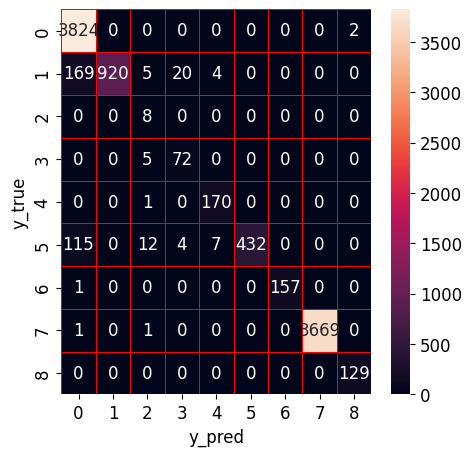

In [ ]:
# Ensemble method 3: hybrid stacking

# Get the predictions and prediction probabilities of the top-3 models
top_3_train_predictions = [globals()[model.lower() + '_train'] for model in top_3_models]
top_3_test_predictions = [globals()[model.lower() + '_test'] for model in top_3_models]

top_3_train_proba = [globals()[model.lower() + '_prob_train'] for model in top_3_models]
top_3_test_proba = [globals()[model.lower() + '_prob_test'] for model in top_3_models]

# Combine the predictions and prediction probabilities of the top-3 models
x_train = np.concatenate(top_3_train_predictions + top_3_train_proba, axis=1)
x_test = np.concatenate(top_3_test_predictions + top_3_test_proba, axis=1)

# Train and evaluate the stacking model
# calcualte the traning time
start_time = time.time()
#stk = lgb.LGBMClassifier().fit(x_train, y_train)
stk =  xgb.XGBClassifier(random_state=0).fit(x_train, y_train)
end_time = time.time()
stk_time = end_time - start_time
print('Training time of Stacking: '+ str(stk_time))

# calcualte the testing time per sample in milliseconds
start_time = time.time()
y_predict=stk.predict(x_test)
end_time = time.time()
stk_time = (end_time - start_time)/len(x_test)*1000
print('Testing time of Stacking: '+ str(stk_time))

y_true=y_test
stk_score=accuracy_score(y_true,y_predict)
print('Accuracy of Stacking: '+ str(stk_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of Stacking: '+(str(precision)))
print('Recall of Stacking: '+(str(recall)))
print('F1-score of Stacking: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

## Automated Feature Selection

In [ ]:
# Save the feature importance lists generated by base ML algorithms
dt_feature = dt.feature_importances_
rf_feature = rf.feature_importances_
et_feature = et.feature_importances_
xg_feature = xg.feature_importances_
lgbm_feature = lgbm.feature_importances_
cat_feature = cat.feature_importances_

In [ ]:
lgbm_feature = lgbm_feature/sum(lgbm_feature)
cat_feature = cat_feature/sum(cat_feature)

In [ ]:
# Get the feature importances of the top-3 models
top_3_importances = [globals()[model.lower() + '_feature'] for model in top_3_models]

# Calculate the average importance of each feature
avg_feature = np.mean(top_3_importances, axis=0)

feature=(df.drop(['Label'],axis=1)).columns.values
print ("Features sorted by their score:")
print (sorted(zip(map(lambda x: round(x, 4), avg_feature), feature), reverse=True))

f_list = sorted(zip(map(lambda x: round(x, 4), avg_feature), feature), reverse=True)


Features sorted by their score:
[(0.1882, 'Seq'), (0.1157, 'sTtl'), (0.1107, 'dDSb'), (0.0809, 'Offset'), (0.0799, 'AckDat'), (0.0762, 'sMeanPktSz'), (0.0603, 'Proto'), (0.0477, 'sHops'), (0.0476, 'SrcWin'), (0.0334, 'State'), (0.0315, 'SrcTCPBase'), (0.0285, 'DstWin'), (0.0279, 'TcpRtt'), (0.0199, 'SynAck'), (0.0197, 'TotBytes'), (0.0193, 'Cause'), (0.0128, 'SrcBytes')]


In [ ]:
# Select the important features from top-importance to bottom-importance until the accumulated importance reaches 0.9 (out of 1)
Sum = 0
fs = []
for i in range(0, len(f_list)):
    Sum = Sum + f_list[i][0]
    fs.append(f_list[i][1])
    if Sum>=0.9:
        break

In [ ]:
# regenerate the training and test sets with the selected features

X_fs = df[fs].values
X_train, X_test, y_train, y_test = train_test_split(X_fs,y, train_size = 0.8, test_size = 0.2, random_state = 0,stratify = y)

In [ ]:
X_train.shape

(38908, 12)

In [ ]:
# save the dataset with the selected features
df_fs = pd.DataFrame(X_fs, columns=fs)
df_fs['Label'] = y
df_fs.to_csv('/content/drive/My Drive/dataset.csv', index=False)

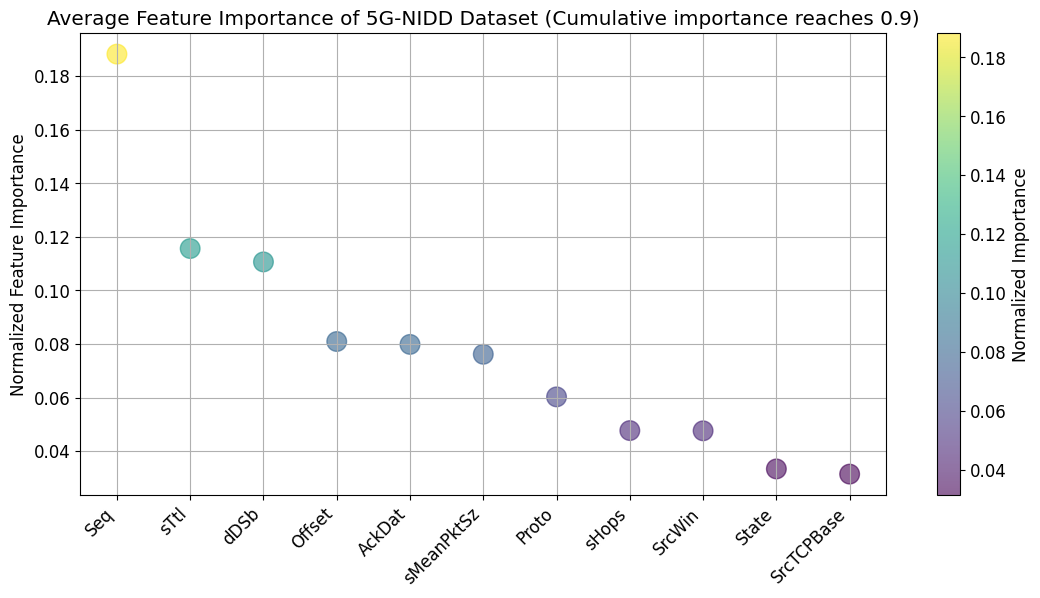

In [ ]:
# Plot the feature importance of the top-3 models
plt.rcParams.update({'font.size': 12})

# Create a DataFrame for easier plotting
features = pd.DataFrame({
    'Feature': df.drop(['Label'],axis=1).columns,
    'Importance': avg_feature
})

# Sort features by importance
features = features.sort_values(by='Importance', ascending=False)

# Calculate cumulative importance and filter features
features['Cumulative'] = features['Importance'].cumsum()
filtered_features = features[features['Cumulative'] <= 0.9]

# Plotting
plt.figure(figsize=(13, 6))
scatter = plt.scatter(x='Feature', y='Importance', s=200, c='Importance', cmap='viridis', alpha=0.6, data=filtered_features)
plt.colorbar(scatter, label='Normalized Importance')
plt.xticks(rotation=45, ha='right')
plt.title('Average Feature Importance of 5G-NIDD Dataset (Cumulative importance reaches 0.9)')
plt.ylabel('Normalized Feature Importance')
plt.grid(True)
plt.show()

### Data Balancing by Proposed TVAE-based Method

In [ ]:
pd.Series(y_train).value_counts()

,count
0,15304
7,14680
1,4469
5,2278
4,685
6,632
8,518
3,309
2,33


In [ ]:
!pip install sdv


In [ ]:
from sdv.metadata import SingleTableMetadata

metadata = SingleTableMetadata()
metadata.detect_from_csv(filepath='/content/drive/My Drive/dataset.csv')


In [ ]:
training_set, test_set = train_test_split(df, test_size = 0.2, random_state = 0,stratify = df['Label'])
X_train = training_set[fs]
y_train = training_set.iloc[:, -1]
X_test = test_set[fs]
y_test = test_set.iloc[:, -1]

In [ ]:
training_set['Label'].value_counts()

,count
Label,
0,15304
7,14680
1,4469
5,2278
4,685
6,632
8,518
3,309
2,33


In [ ]:
from sdv.single_table import TVAESynthesizer
# Identify the average number of samples per class
average_samples = y_train.value_counts().mean()

# Identify minority classes with less than half the average number of samples
minority_classes = y_train.value_counts()
minority_classes = minority_classes[minority_classes < average_samples / 2].index.tolist()

# Prepare an empty DataFrame to collect synthetic data
synthetic_data = pd.DataFrame()

In [ ]:
# Generating synthetic samples for each minority class using TVAE
for cls in minority_classes:
    cls_samples = X_train[y_train == cls]
    num_samples_needed = int(average_samples - len(cls_samples))

    # Initialize the TVAE model with detected metadata
    tvaegan = TVAESynthesizer(metadata=metadata)

    # Fit the TVAE model on the minority class samples
    tvaegan.fit(cls_samples.assign(Label=y_train[y_train == cls]))  # add Label temporarily for TVAE training

    # Generate synthetic instances to match the average class sample size
    new_samples = tvaegan.sample(num_samples_needed)

    # Append the new synthetic instances to the synthetic data list
    synthetic_data = pd.concat([synthetic_data, new_samples], ignore_index=True)


In [ ]:
# Concatenate the original and synthetic data to form a balanced dataset
balanced_data = pd.concat([X_train.assign(Label=y_train), synthetic_data], ignore_index=True)

# Display the new distribution of labels in the balanced dataset
print(balanced_data['Label'].value_counts())

# Prepare the balanced dataset for model training
X_train_balanced = balanced_data.drop(['Label'], axis=1)
y_train_balanced = balanced_data['Label']

Label
0    15304
7    14680
1     4469
3     4323
8     4323
6     4323
4     4323
2     4323
5     2278
Name: count, dtype: int64


## Machine learning model training

### Training six base learners:
decision tree, random forest, extra trees, XGBoost, LightGBM, and CatBoost


### Cross-validation

### DT

In [ ]:
print(X_train_balanced.dtypes)
print(y_train_balanced.dtypes)


Seq           float64
sTtl          float64
dDSb          float64
Offset        float64
AckDat        float64
sMeanPktSz    float64
Proto         float64
sHops         float64
SrcWin        float64
State          object
SrcTCPBase    float64
DstWin        float64
dtype: object
int64


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Convert all columns in X_train_balanced to uniform types, handling NaNs
X_train_balanced = X_train_balanced.apply(pd.to_numeric, errors='ignore')  # Convert numeric columns if possible
X_test = X_test.apply(pd.to_numeric, errors='ignore')

# Fill NaN values if any (you can change the strategy to mean/median for numeric columns if needed)
X_train_balanced = X_train_balanced.fillna('missing')
X_test = X_test.fillna('missing')

# Apply Label Encoding to categorical columns
for column in X_train_balanced.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_train_balanced[column] = le.fit_transform(X_train_balanced[column].astype(str))
    X_test[column] = le.transform(X_test[column].astype(str))


Training time:  0.3471825122833252
Prediction time per sample:  0.000419340243465022
Cross-Validation scores:  [0.88724356 0.99861175 0.99881736]
Mean of Cross-Validation scores:  0.9615575576697878
Accuracy of DT: 0.9986636513157895
Precision of DT: 0.9986644582081228
Recall of DT: 0.9986636513157895
F1-score of DT: 0.9986630915694474
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3826
           1       1.00      1.00      1.00      1118
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00        77
           4       1.00      1.00      1.00       171
           5       0.99      0.99      0.99       570
           6       1.00      0.99      1.00       158
           7       1.00      1.00      1.00      3671
           8       1.00      0.99      1.00       129

    accuracy                           1.00      9728
   macro avg       1.00      1.00      1.00      9728
weighted avg

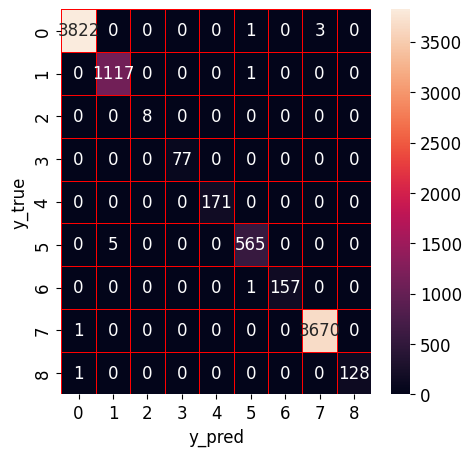

CPU times: user 1.76 s, sys: 62.8 ms, total: 1.82 s
Wall time: 1.92 s


In [ ]:
%%time
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support
import seaborn as sns
import matplotlib.pyplot as plt


# Decision tree training and prediction with 3-fold cross-validation
dt = DecisionTreeClassifier(random_state=0)
dt_scores = cross_val_score(dt, X_train_balanced, y_train_balanced, cv=3)

# calculate the training time
start = time.time()
dt.fit(X_train_balanced, y_train_balanced)
end = time.time()
print('Training time: ', end - start)

# calculate the prediction time per sample in milliseconds
start = time.time()
y_predict = dt.predict(X_test)
end = time.time()
print('Prediction time per sample: ', (end - start) / len(X_test)*1000)

y_true = y_test

# Print out the cross-validation scores and mean of them
print('Cross-Validation scores: ', dt_scores)
print('Mean of Cross-Validation scores: ', np.mean(dt_scores))

# Evaluation metrics
dt_score = dt.score(X_test, y_test)
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_predict, average='weighted')

# Print results
print('Accuracy of DT: ' + str(dt_score))
print('Precision of DT: ' + str(precision))
print('Recall of DT: ' + str(recall))
print('F1-score of DT: ' + str(fscore))
print(classification_report(y_true, y_predict))

# Confusion matrix visualization
cm = confusion_matrix(y_true, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


100%|██████████| 20/20 [00:14<00:00,  1.38trial/s, best loss: -0.9617289566625385]
Decision Tree: Hyperopt estimated optimum {'criterion': 'entropy', 'max_depth': 40, 'min_samples_leaf': 1, 'min_samples_split': 5}
Accuracy of DT: 0.998766447368421
Precision of DT: 0.9987785621967183
Recall of DT: 0.998766447368421
F1-score of DT: 0.9987688493770495
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3826
           1       1.00      1.00      1.00      1118
           2       0.89      1.00      0.94         8
           3       1.00      1.00      1.00        77
           4       1.00      1.00      1.00       171
           5       1.00      0.99      0.99       570
           6       1.00      0.99      1.00       158
           7       1.00      1.00      1.00      3671
           8       1.00      1.00      1.00       129

    accuracy                           1.00      9728
   macro avg       0.99      1.00      0.99      9728

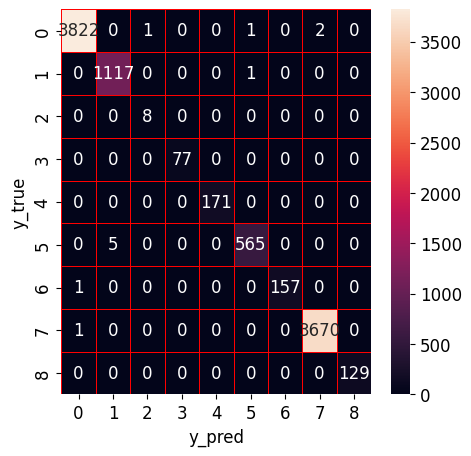

In [ ]:
# Hyperparameter Optimization using BO-TPE

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
import seaborn as sns
import matplotlib.pyplot as plt

# Define the objective function
def objective(params):
    params = {
        'max_depth': int(params['max_depth']),
        'min_samples_split': int(params['min_samples_split']),
        'min_samples_leaf': int(params['min_samples_leaf']),
        'criterion': ['gini', 'entropy'][int(params['criterion'])]
    }
    clf = DecisionTreeClassifier(random_state=0, **params)
    score = cross_val_score(clf, X_train_balanced, y_train_balanced, scoring='accuracy', cv=StratifiedKFold(n_splits=3)).mean()

    return {'loss': -score, 'status': STATUS_OK }

# Define the hyperparameter configuration space
space = {
    'max_depth': hp.quniform('max_depth', 1, 50, 1),
    'min_samples_split': hp.quniform('min_samples_split', 2, 11, 1),
    'min_samples_leaf': hp.quniform('min_samples_leaf', 1, 11, 1),
    'criterion': hp.choice('criterion', [0, 1])  # 0 for 'gini', 1 for 'entropy'
}

# Run the optimizer
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20)

# Convert the returned hyperparameters to their original types
best['max_depth'] = int(best['max_depth'])
best['min_samples_split'] = int(best['min_samples_split'])
best['min_samples_leaf'] = int(best['min_samples_leaf'])
best['criterion'] = ['gini', 'entropy'][int(best['criterion'])]

print("Decision Tree: Hyperopt estimated optimum {}".format(best))

# Use the best parameters to train the model
dt = DecisionTreeClassifier(random_state=0, **best)
dt.fit(X_train_balanced, y_train_balanced)

# Make predictions
y_predict = dt.predict(X_test)
y_true = y_test

# Evaluation metrics
dt_score = dt.score(X_test, y_test)
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_predict, average='weighted')

# Print results
print('Accuracy of DT: ' + str(dt_score))
print('Precision of DT: ' + str(precision))
print('Recall of DT: ' + str(recall))
print('F1-score of DT: ' + str(fscore))
print(classification_report(y_true, y_predict))

# Confusion matrix visualization
cm = confusion_matrix(y_true, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


### RF

Training time:  7.541544198989868
Prediction time:  0.0074643298591438095 ms
Cross-Validation scores:  [0.90313127 0.99912592 0.99948581]
Mean of Cross-Validation scores:  0.9672476645895814
Accuracy of RF: 0.9988692434210527
Precision of RF: 0.9988710850990838
Recall of RF: 0.9988692434210527
F1-score of RF: 0.9988684249730341
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3826
           1       0.99      1.00      1.00      1118
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00        77
           4       1.00      1.00      1.00       171
           5       1.00      0.99      0.99       570
           6       1.00      0.99      1.00       158
           7       1.00      1.00      1.00      3671
           8       1.00      1.00      1.00       129

    accuracy                           1.00      9728
   macro avg       1.00      1.00      1.00      9728
weighted avg       1

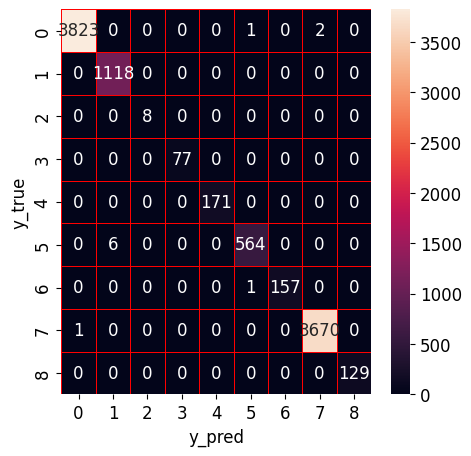

CPU times: user 20.4 s, sys: 142 ms, total: 20.6 s
Wall time: 21.2 s


In [ ]:
%%time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Random Forest training and prediction with 3-fold cross-validation
rf = RandomForestClassifier(random_state=0)
rf_scores = cross_val_score(rf, X_train_balanced, y_train_balanced, cv=3)

# calculate the training time
start = time.time()
rf.fit(X_train_balanced, y_train_balanced)
end = time.time()
print('Training time: ', end - start)

# calculate the prediction time per sample in milliseconds
start = time.time()
y_predict = rf.predict(X_test)
end = time.time()
print('Prediction time: ', (end - start) / len(y_predict) * 1000, 'ms')

y_true = y_test

# Print out the cross-validation scores and mean of them
print('Cross-Validation scores: ', rf_scores)
print('Mean of Cross-Validation scores: ', np.mean(rf_scores))

# Evaluation metrics
rf_score = rf.score(X_test, y_test)
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_predict, average='weighted')

# Print results
print('Accuracy of RF: ' + str(rf_score))
print('Precision of RF: ' + str(precision))
print('Recall of RF: ' + str(recall))
print('F1-score of RF: ' + str(fscore))
print(classification_report(y_true, y_predict))

# Confusion matrix visualization
cm = confusion_matrix(y_true, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


100%|██████████| 20/20 [12:44<00:00, 38.22s/trial, best loss: -0.9669048798230548]
Random Forest: Hyperopt estimated optimum {'criterion': 'gini', 'max_depth': 39, 'max_features': 3, 'min_samples_leaf': 10, 'min_samples_split': 11, 'n_estimators': 89}
Accuracy of RF: 0.9983552631578947
Precision of RF: 0.9983620177217709
Recall of RF: 0.9983552631578947
F1-score of RF: 0.9983524599984733
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3826
           1       0.99      1.00      1.00      1118
           2       1.00      1.00      1.00         8
           3       0.99      1.00      0.99        77
           4       1.00      0.99      1.00       171
           5       1.00      0.98      0.99       570
           6       0.99      0.99      0.99       158
           7       1.00      1.00      1.00      3671
           8       1.00      1.00      1.00       129

    accuracy                           1.00      9728
   macro avg 

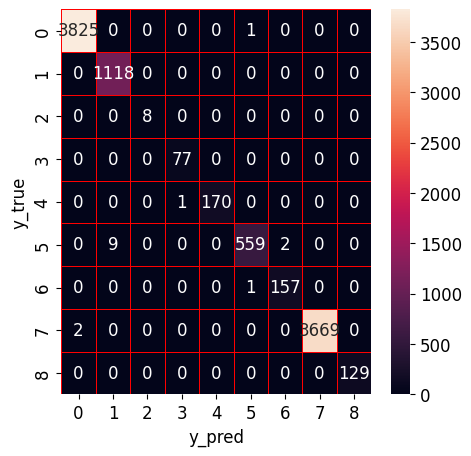

In [ ]:
# Hyperparameter Optimization using BO-TPE

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
import seaborn as sns
import matplotlib.pyplot as plt

# Define the objective function
def objective(params):
    params = {
        'n_estimators': int(params['n_estimators']),
        'max_depth': int(params['max_depth']),
        'max_features': int(params['max_features']),
        'min_samples_split': int(params['min_samples_split']),
        'min_samples_leaf': int(params['min_samples_leaf']),
        'criterion': ['gini', 'entropy'][int(params['criterion'])]
    }
    clf = RandomForestClassifier(random_state=0, **params)
    score = cross_val_score(clf, X_train_balanced, y_train_balanced, scoring='accuracy', cv=StratifiedKFold(n_splits=3)).mean()

    return {'loss': -score, 'status': STATUS_OK }

# Define the hyperparameter configuration space
space = {
    'n_estimators': hp.quniform('n_estimators', 10, 200, 1),
    'max_depth': hp.quniform('max_depth', 5, 50, 1),
    "max_features":hp.quniform('max_features', 1, 40, 1),
    "min_samples_split":hp.quniform('min_samples_split',2,11,1),
    "min_samples_leaf":hp.quniform('min_samples_leaf',1,11,1),
    'criterion': hp.choice('criterion', [0, 1])  # 0 for 'gini', 1 for 'entropy'
}

# Run the optimizer
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20)

# Convert the returned hyperparameters to their original types
best['n_estimators'] = int(best['n_estimators'])
best['max_depth'] = int(best['max_depth'])
best['max_features'] = int(best['max_features'])
best['min_samples_split'] = int(best['min_samples_split'])
best['min_samples_leaf'] = int(best['min_samples_leaf'])
best['criterion'] = ['gini', 'entropy'][int(best['criterion'])]

print("Random Forest: Hyperopt estimated optimum {}".format(best))

# Use the best parameters to train the model
rf = RandomForestClassifier(random_state=0, **best)
rf.fit(X_train_balanced, y_train_balanced)

# Make predictions
y_predict = rf.predict(X_test)
y_true = y_test

# Evaluation metrics
rf_score = rf.score(X_test, y_test)
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_predict, average='weighted')

# Print results
print('Accuracy of RF: ' + str(rf_score))
print('Precision of RF: ' + str(precision))
print('Recall of RF: ' + str(recall))
print('F1-score of RF: ' + str(fscore))
print(classification_report(y_true, y_predict))

# Confusion matrix visualization
cm = confusion_matrix(y_true, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


### ET

Training time:  3.5819976329803467
Prediction time:  0.01577662892247501 ms
Cross-Validation scores:  [0.99727492 0.99917734 0.99938297]
Mean of Cross-Validation scores:  0.9986117432424969
Accuracy of ET: 0.9989720394736842
Precision of ET: 0.998974451288716
Recall of ET: 0.9989720394736842
F1-score of ET: 0.9989711174923446
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3826
           1       0.99      1.00      1.00      1118
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00        77
           4       1.00      1.00      1.00       171
           5       1.00      0.99      0.99       570
           6       1.00      0.99      1.00       158
           7       1.00      1.00      1.00      3671
           8       1.00      1.00      1.00       129

    accuracy                           1.00      9728
   macro avg       1.00      1.00      1.00      9728
weighted avg       1.0

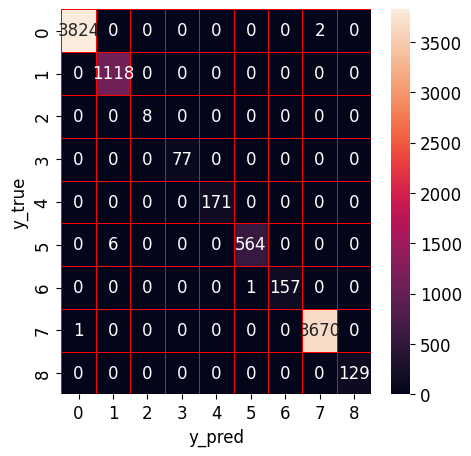

CPU times: user 9.49 s, sys: 77.6 ms, total: 9.57 s
Wall time: 9.7 s


In [ ]:
%%time
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Extra Trees training and prediction with 3-fold cross-validation
et = ExtraTreesClassifier(random_state=0)
et_scores = cross_val_score(et, X_train_balanced, y_train_balanced, cv=3)

# calculate the training time
start = time.time()
et.fit(X_train_balanced, y_train_balanced)
end = time.time()
print('Training time: ', end - start)

# calculate the prediction time per sample in milliseconds
start = time.time()
y_predict = et.predict(X_test)
end = time.time()
print('Prediction time: ', (end - start) / len(X_test) * 1000, 'ms')


y_true = y_test

# Print out the cross-validation scores and mean of them
print('Cross-Validation scores: ', et_scores)
print('Mean of Cross-Validation scores: ', np.mean(et_scores))

# Evaluation metrics
et_score = et.score(X_test, y_test)
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_predict, average='weighted')

# Print results
print('Accuracy of ET: ' + str(et_score))
print('Precision of ET: ' + str(precision))
print('Recall of ET: ' + str(recall))
print('F1-score of ET: ' + str(fscore))
print(classification_report(y_true, y_predict))

# Confusion matrix visualization
cm = confusion_matrix(y_true, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


100%|██████████| 20/20 [02:43<00:00,  8.18s/trial, best loss: -0.9983203741199768]
Extra Trees: Hyperopt estimated optimum {'criterion': 'gini', 'max_depth': 37, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 7, 'n_estimators': 135}
Accuracy of ET: 0.9984580592105263
Precision of ET: 0.9984704808229848
Recall of ET: 0.9984580592105263
F1-score of ET: 0.9984548589166664
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3826
           1       0.99      1.00      0.99      1118
           2       1.00      1.00      1.00         8
           3       0.99      1.00      0.99        77
           4       1.00      0.99      1.00       171
           5       1.00      0.98      0.99       570
           6       1.00      0.99      1.00       158
           7       1.00      1.00      1.00      3671
           8       1.00      1.00      1.00       129

    accuracy                           1.00      9728
   macro avg    

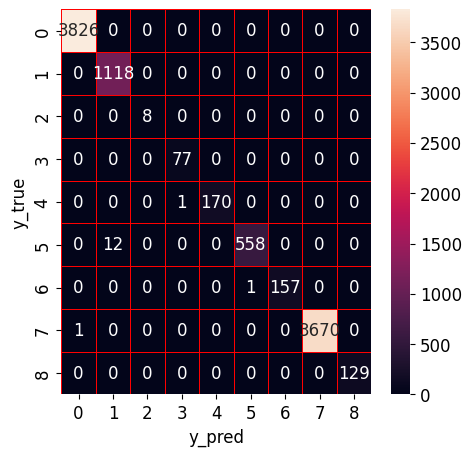

In [ ]:
# Hyperparameter Optimization using BO-TPE

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
import seaborn as sns
import matplotlib.pyplot as plt

# Define the objective function
def objective(params):
    params = {
        'n_estimators': int(params['n_estimators']),
        'max_depth': int(params['max_depth']),
        'max_features': int(params['max_features']),
        'min_samples_split': int(params['min_samples_split']),
        'min_samples_leaf': int(params['min_samples_leaf']),
        'criterion': ['gini', 'entropy'][int(params['criterion'])]
    }
    clf = ExtraTreesClassifier(random_state=0, **params)
    score = cross_val_score(clf, X_train_balanced, y_train_balanced, scoring='accuracy', cv=StratifiedKFold(n_splits=3)).mean()

    return {'loss': -score, 'status': STATUS_OK }

# Define the hyperparameter configuration space
space = {
    'n_estimators': hp.quniform('n_estimators', 10, 200, 1),
    'max_depth': hp.quniform('max_depth', 1, 50, 1),
    'max_features': hp.quniform('max_features', 1, 20, 1),
    'min_samples_split': hp.quniform('min_samples_split', 2, 11, 1),
    'min_samples_leaf': hp.quniform('min_samples_leaf', 1, 11, 1),
    'criterion': hp.choice('criterion', [0, 1])  # 0 for 'gini', 1 for 'entropy'
}

# Run the optimizer
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20)

# Convert the returned hyperparameters to their original types
best['n_estimators'] = int(best['n_estimators'])
best['max_depth'] = int(best['max_depth'])
best['max_features'] = int(best['max_features'])
best['min_samples_split'] = int(best['min_samples_split'])
best['min_samples_leaf'] = int(best['min_samples_leaf'])
best['criterion'] = ['gini', 'entropy'][int(best['criterion'])]

print("Extra Trees: Hyperopt estimated optimum {}".format(best))

# Use the best parameters to train the model
et = ExtraTreesClassifier(random_state=0, **best)
et.fit(X_train_balanced, y_train_balanced)

# Make predictions
y_predict = et.predict(X_test)
y_true = y_test

# Evaluation metrics
et_score = et.score(X_test, y_test)
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_predict, average='weighted')

# Print results
print('Accuracy of ET: ' + str(et_score))
print('Precision of ET: ' + str(precision))
print('Recall of ET: ' + str(recall))
print('F1-score of ET: ' + str(fscore))
print(classification_report(y_true, y_predict))

# Confusion matrix visualization
cm = confusion_matrix(y_true, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


### XGBoost

Training time:  7.440409421920776
Prediction time per sample:  0.008266468189264598
Cross-Validation scores:  [0.96097486 0.99881742 0.99933155]
Mean of Cross-Validation scores:  0.9863746093466812
Accuracy of XGBoost: 0.9989720394736842
Precision of XGBoost: 0.9989735479205536
Recall of XGBoost: 0.9989720394736842
F1-score of XGBoost: 0.9989716559890934
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3826
           1       1.00      1.00      1.00      1118
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00        77
           4       1.00      1.00      1.00       171
           5       1.00      0.99      0.99       570
           6       1.00      0.99      1.00       158
           7       1.00      1.00      1.00      3671
           8       0.99      1.00      1.00       129

    accuracy                           1.00      9728
   macro avg       1.00      1.00      1.00    

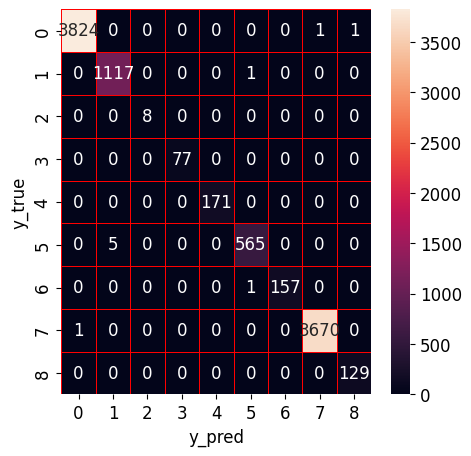

In [ ]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# XGBoost training and prediction with 3-fold cross-validation
xg = xgb.XGBClassifier(random_state=0)
xg_scores = cross_val_score(xg, X_train_balanced, y_train_balanced, cv=3)

# calculate the training time
start = time.time()
xg.fit(X_train_balanced, y_train_balanced)
end = time.time()
print('Training time: ', end - start)

# calculate the prediction time per sample in milliseconds
start = time.time()
y_predict = xg.predict(X_test)
end = time.time()
print('Prediction time per sample: ', (end - start) / len(X_test) * 1000)


y_true = y_test

# Print out the cross-validation scores and mean of them
print('Cross-Validation scores: ', xg_scores)
print('Mean of Cross-Validation scores: ', np.mean(xg_scores))

# Evaluation metrics
xg_score = xg.score(X_test, y_test)
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_predict, average='weighted')

# Print results
print('Accuracy of XGBoost: ' + str(xg_score))
print('Precision of XGBoost: ' + str(precision))
print('Recall of XGBoost: ' + str(recall))
print('F1-score of XGBoost: ' + str(fscore))
print(classification_report(y_true, y_predict))

# Confusion matrix visualization
cm = confusion_matrix(y_true, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


100%|██████████| 20/20 [00:53<00:00,  2.67s/trial, best loss: -0.9990748355263158]
XGBoost: Hyperopt estimated optimum {'learning_rate': 0.512917935824966, 'max_depth': 31, 'n_estimators': 25}
Accuracy of XGBoost: 0.9990748355263158
Precision of XGBoost: 0.9990759758783083
Recall of XGBoost: 0.9990748355263158
F1-score of XGBoost: 0.9990746530067328
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3826
           1       1.00      1.00      1.00      1118
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00        77
           4       1.00      1.00      1.00       171
           5       1.00      0.99      0.99       570
           6       1.00      0.99      1.00       158
           7       1.00      1.00      1.00      3671
           8       0.99      1.00      1.00       129

    accuracy                           1.00      9728
   macro avg       1.00      1.00      1.00      972

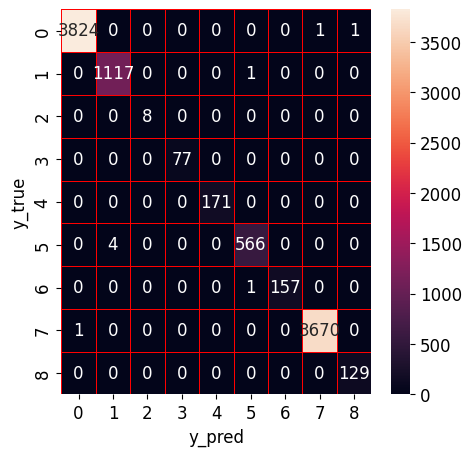

In [ ]:
# Hyperparameter Optimization using BO-TPE

import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Define the objective function
def objective(params):
    params = {
        'n_estimators': int(params['n_estimators']),
        'max_depth': int(params['max_depth']),
        'learning_rate': abs(float(params['learning_rate']))
    }
    clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=0, **params)
    clf.fit(X_train_balanced, y_train_balanced)
    y_pred = clf.predict(X_test)
    score = accuracy_score(y_test, y_pred)

    return {'loss': -score, 'status': STATUS_OK }

# Define the hyperparameter configuration space
space = {
    'n_estimators': hp.quniform('n_estimators', 10, 100, 5),
    'max_depth': hp.quniform('max_depth', 4, 100, 1),
    'learning_rate': hp.normal('learning_rate', 0.01, 0.9)
}

# Run the optimizer
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20)

# Convert the returned hyperparameters to their original types
best['n_estimators'] = int(best['n_estimators'])
best['max_depth'] = int(best['max_depth'])
best['learning_rate'] = abs(float(best['learning_rate']))

print("XGBoost: Hyperopt estimated optimum {}".format(best))

# Use the best parameters to train the model
xg = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=0, **best)
xg.fit(X_train_balanced, y_train_balanced)

# Make predictions
y_predict = xg.predict(X_test)
y_true = y_test

# Evaluation metrics
xg_score = xg.score(X_test, y_test)
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_predict, average='weighted')

# Print results
print('Accuracy of XGBoost: ' + str(xg_score))
print('Precision of XGBoost: ' + str(precision))
print('Recall of XGBoost: ' + str(recall))
print('F1-score of XGBoost: ' + str(fscore))
print(classification_report(y_true, y_predict))

# Confusion matrix visualization
cm = confusion_matrix(y_true, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


### LightGBM

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004568 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2857
[LightGBM] [Info] Number of data points in the train set: 38897, number of used features: 12
[LightGBM] [Info] Start training from score -1.338333
[LightGBM] [Info] Start training from score -2.569329
[LightGBM] [Info] Start training from score -2.602433
[LightGBM] [Info] Start training from score -2.602433
[LightGBM] [Info] Start training from score -2.602433
[LightGBM] [Info] Start training from score -3.242865
[LightGBM] [Info] Start training from score -2.602433
[LightGBM] [Info] Start training from score -1.379862
[LightGBM] [Info] Start training from score -2.602433
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] 

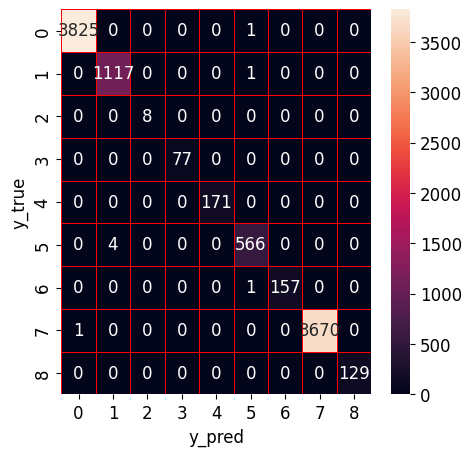

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# LightGBM training and prediction with 3-fold cross-validation
lgbm = lgb.LGBMClassifier(random_state=0)
lgbm_scores = cross_val_score(lgbm, X_train_balanced, y_train_balanced, cv=3)

# calculate the training time
start = time.time()
lgbm.fit(X_train_balanced, y_train_balanced)
end = time.time()
print('Training time: ', end - start)

# calculate the prediction time per sample in milliseconds
start = time.time()
y_predict = lgbm.predict(X_test)
end = time.time()
print('Prediction time per sample: ', (end - start) / len(X_test) * 1000)



y_true = y_test

# Print out the cross-validation scores and mean of them
print('Cross-Validation scores: ', lgbm_scores)
print('Mean of Cross-Validation scores: ', np.mean(lgbm_scores))

# Evaluation metrics
lgbm_score = lgbm.score(X_test, y_test)
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_predict, average='weighted')

# Print results
print('Accuracy of LightGBM: ' + str(lgbm_score))
print('Precision of LightGBM: ' + str(precision))
print('Recall of LightGBM: ' + str(recall))
print('F1-score of LightGBM: ' + str(fscore))
print(classification_report(y_true, y_predict))

# Confusion matrix visualization
cm = confusion_matrix(y_true, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

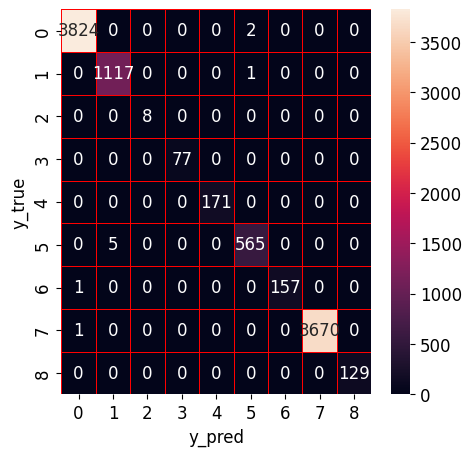

In [ ]:
# Hyperparameter Optimization using BO-TPE

import lightgbm as lgb
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Define the objective function
def objective(params):
    params = {
        'n_estimators': int(params['n_estimators']),
        'max_depth': int(params['max_depth']),
        'learning_rate': abs(float(params['learning_rate'])),
        'num_leaves': int(params['num_leaves']),
        'min_child_samples': int(params['min_child_samples'])
    }
    clf = lgb.LGBMClassifier(random_state=0, **params)
    clf.fit(X_train_balanced, y_train_balanced)
    y_pred = clf.predict(X_test)
    score = accuracy_score(y_test, y_pred)

    return {'loss': -score, 'status': STATUS_OK }

# Define the hyperparameter configuration space
space = {
    'n_estimators': hp.quniform('n_estimators', 10, 100, 5),
    'max_depth': hp.quniform('max_depth', 4, 100, 1),
    'learning_rate': hp.normal('learning_rate', 0.01, 0.9),
    'num_leaves': hp.quniform('num_leaves', 10, 200, 5),
    'min_child_samples': hp.quniform('min_child_samples', 5, 100, 5)
}

# Run the optimizer
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20)

# Convert the returned hyperparameters to their original types
best['n_estimators'] = int(best['n_estimators'])
best['max_depth'] = int(best['max_depth'])
best['learning_rate'] = abs(float(best['learning_rate']))
best['num_leaves'] = int(best['num_leaves'])
best['min_child_samples'] = int(best['min_child_samples'])

print("LightGBM: Hyperopt estimated optimum {}".format(best))

# Use the best parameters to train the model
lgbm = lgb.LGBMClassifier(random_state=0, **best)
lgbm.fit(X_train_balanced, y_train_balanced)

# Make predictions
y_predict = lgbm.predict(X_test)
y_true = y_test

# Evaluation metrics
lgbm_score = lgbm.score(X_test, y_test)
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_predict, average='weighted')

# Print results
print('Accuracy of LightGBM: ' + str(lgbm_score))
print('Precision of LightGBM: ' + str(precision))
print('Recall of LightGBM: ' + str(recall))
print('F1-score of LightGBM: ' + str(fscore))
print(classification_report(y_true, y_predict))

# Confusion matrix visualization
cm = confusion_matrix(y_true, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


### CatBoost

Training time:  143.91649174690247
Prediction time per sample:  0.014099145406170896
Cross-Validation scores:  [0.95588462 0.998766   0.99928013]
Mean of Cross-Validation scores:  0.9846435854479516
Accuracy of CatBoost: 0.9985608552631579
Precision of CatBoost: 0.9985632453489893
Recall of CatBoost: 0.9985608552631579
F1-score of CatBoost: 0.9985596123268268
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3826
           1       0.99      1.00      1.00      1118
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00        77
           4       1.00      1.00      1.00       171
           5       0.99      0.99      0.99       570
           6       1.00      0.99      1.00       158
           7       1.00      1.00      1.00      3671
           8       1.00      1.00      1.00       129

    accuracy                           1.00      9728
   macro avg       1.00      1.00      1.0

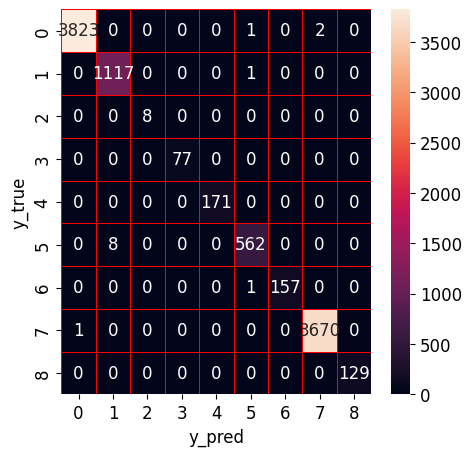

In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# CatBoost training and prediction with 3-fold cross-validation
cat = CatBoostClassifier(random_state=0, verbose=False)
cat_scores = cross_val_score(cat, X_train_balanced, y_train_balanced, cv=3)


# calculate the training time
start = time.time()
cat.fit(X_train_balanced, y_train_balanced)
end = time.time()
print('Training time: ', end - start)

# calculate the prediction time per sample in milliseconds
start = time.time()
y_predict = cat.predict(X_test)
end = time.time()
print('Prediction time per sample: ', (end - start) / len(X_test) * 1000)


# Print out the cross-validation scores and mean of them
print('Cross-Validation scores: ', cat_scores)
print('Mean of Cross-Validation scores: ', np.mean(cat_scores))

# Evaluation metrics
cat_score = cat.score(X_test, y_test)
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_predict, average='weighted')

# Print results
print('Accuracy of CatBoost: ' + str(cat_score))
print('Precision of CatBoost: ' + str(precision))
print('Recall of CatBoost: ' + str(recall))
print('F1-score of CatBoost: ' + str(fscore))
print(classification_report(y_true, y_predict))

# Confusion matrix visualization
cm = confusion_matrix(y_true, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


100%|██████████| 2/2 [12:27<00:00, 373.78s/trial, best loss: -0.998766447368421]
CatBoost: Hyperopt estimated optimum {'depth': 6, 'iterations': 300, 'learning_rate': 0.25345405284718525}
Accuracy of CatBoost: 0.998766447368421
Precision of CatBoost: 0.9987685334951002
Recall of CatBoost: 0.998766447368421
F1-score of CatBoost: 0.9987658048013465
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3826
           1       0.99      1.00      1.00      1118
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00        77
           4       1.00      1.00      1.00       171
           5       1.00      0.99      0.99       570
           6       1.00      0.99      1.00       158
           7       1.00      1.00      1.00      3671
           8       0.99      1.00      1.00       129

    accuracy                           1.00      9728
   macro avg       1.00      1.00      1.00      9728
w

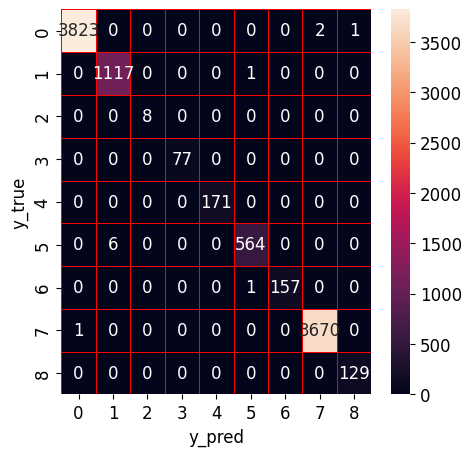

In [ ]:
# Hyperparameter Optimization using BO-TPE

import catboost as cb
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Define the objective function
def objective(params):
    params = {
        'depth': int(params['depth']),
        'learning_rate': params['learning_rate'],
        'iterations': int(params['iterations'])
    }
    clf = cb.CatBoostClassifier(random_state=0, verbose=False, **params)
    clf.fit(X_train_balanced, y_train_balanced)
    y_pred = clf.predict(X_test)
    score = accuracy_score(y_test, y_pred)

    return {'loss': -score, 'status': STATUS_OK }

# Define the hyperparameter configuration space
space = {
    'depth': hp.quniform('depth', 2, 12, 1),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.5),
    'iterations': hp.quniform('iterations', 100, 1000, 100)
}

# Run the optimizer
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=2)

# Convert the returned hyperparameters to their original types
best['depth'] = int(best['depth'])
best['learning_rate'] = best['learning_rate']
best['iterations'] = int(best['iterations'])

print("CatBoost: Hyperopt estimated optimum {}".format(best))

# Use the best parameters to train the model
cat = cb.CatBoostClassifier(random_state=0, verbose=False, **best)
cat.fit(X_train_balanced, y_train_balanced)

# Make predictions
y_predict = cat.predict(X_test)
y_true = y_test

# Evaluation metrics
cat_score = cat.score(X_test, y_test)
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_predict, average='weighted')

# Print results
print('Accuracy of CatBoost: ' + str(cat_score))
print('Precision of CatBoost: ' + str(precision))
print('Recall of CatBoost: ' + str(recall))
print('F1-score of CatBoost: ' + str(fscore))
print(classification_report(y_true, y_predict))

# Confusion matrix visualization
cm = confusion_matrix(y_true, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


In [ ]:
# record the results
dt_train=dt.predict(X_train_balanced)
dt_test=dt.predict(X_test)
dt_prob_train=dt.predict_proba(X_train_balanced)
dt_prob_test=dt.predict_proba(X_test)

rf_train=rf.predict(X_train_balanced)
rf_test=rf.predict(X_test)
rf_prob_train=rf.predict_proba(X_train_balanced)
rf_prob_test=rf.predict_proba(X_test)

et_train=et.predict(X_train_balanced)
et_test=et.predict(X_test)
et_prob_train=et.predict_proba(X_train_balanced)
et_prob_test=et.predict_proba(X_test)

xg_train=xg.predict(X_train_balanced)
xg_test=xg.predict(X_test)
xg_prob_train=xg.predict_proba(X_train_balanced)
xg_prob_test=xg.predict_proba(X_test)

lgbm_train=lgbm.predict(X_train_balanced)
lgbm_test=lgbm.predict(X_test)
lgbm_prob_train=lgbm.predict_proba(X_train_balanced)
lgbm_prob_test=lgbm.predict_proba(X_test)

cat_train=cat.predict(X_train_balanced)
cat_test=cat.predict(X_test)
cat_prob_train=cat.predict_proba(X_train_balanced)
cat_prob_test=cat.predict_proba(X_test)


## Model selection

In [ ]:
# Calculate the performance of each base model (e.g., accuracy)
base_model_performance = {
    'dt': np.mean(dt_scores),
    'rf': np.mean(rf_scores),
    'et': np.mean(et_scores),
    'xg': np.mean(xg_scores),
    'lgbm': np.mean(lgbm_scores),
    'cat': np.mean(cat_scores)

}

# Rank the base models based on their performance
ranked_models = sorted(base_model_performance, key=base_model_performance.get, reverse=True)

# Select the top-3 performing base models
top_3_models = ranked_models[:3]



In [ ]:
top_3_models

['et', 'xg', 'cat']

In [ ]:
dt_train=dt_train.reshape(-1, 1)
et_train=et_train.reshape(-1, 1)
rf_train=rf_train.reshape(-1, 1)
xg_train=xg_train.reshape(-1, 1)
lgbm_train=lgbm_train.reshape(-1, 1)
cat_train=cat_train.reshape(-1, 1)


dt_test=dt_test.reshape(-1, 1)
et_test=et_test.reshape(-1, 1)
rf_test=rf_test.reshape(-1, 1)
xg_test=xg_test.reshape(-1, 1)
lgbm_test=lgbm_test.reshape(-1, 1)
cat_test=cat_test.reshape(-1, 1)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006303 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 27
[LightGBM] [Info] Number of data points in the train set: 58346, number of used features: 3
[LightGBM] [Info] Start training from score -1.338277
[LightGBM] [Info] Start training from score -2.569226
[LightGBM] [Info] Start training from score -2.602441
[LightGBM] [Info] Start training from score -2.602441
[LightGBM] [Info] Start training from score -2.602441
[LightGBM] [Info] Start training from score -3.243093
[LightGBM] [Info] Start training from score -2.602441
[LightGBM] [Info] Start training from score -1.379905
[LightGBM] [Info] Start training from score -2.602441
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

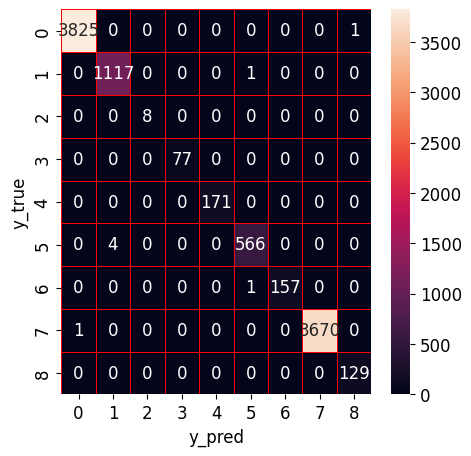

In [ ]:
# Ensemble method 1: traditional stacking

# Get the predictions of the top-3 models
top_3_train_predictions = [globals()[model.lower() + '_train'] for model in top_3_models]
top_3_test_predictions = [globals()[model.lower() + '_test'] for model in top_3_models]

# Stack the predictions of the top-3 models
X_train_balanced = np.concatenate(top_3_train_predictions, axis=1)
x_test = np.concatenate(top_3_test_predictions, axis=1)

# Train and evaluate the stacking model
stk = lgb.LGBMClassifier().fit(X_train_balanced, y_train_balanced)
y_predict=stk.predict(x_test)
y_true=y_test
stk_score=accuracy_score(y_true,y_predict)
print('Accuracy of Stacking: '+ str(stk_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of Stacking: '+(str(precision)))
print('Recall of Stacking: '+(str(recall)))
print('F1-score of Stacking: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005416 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6711
[LightGBM] [Info] Number of data points in the train set: 58346, number of used features: 27
[LightGBM] [Info] Start training from score -1.338277
[LightGBM] [Info] Start training from score -2.569226
[LightGBM] [Info] Start training from score -2.602441
[LightGBM] [Info] Start training from score -2.602441
[LightGBM] [Info] Start training from score -2.602441
[LightGBM] [Info] Start training from score -3.243093
[LightGBM] [Info] Start training from score -2.602441
[LightGBM] [Info] Start training from score -1.379905
[LightGBM] [Info] Start training from score -2.602441
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] 

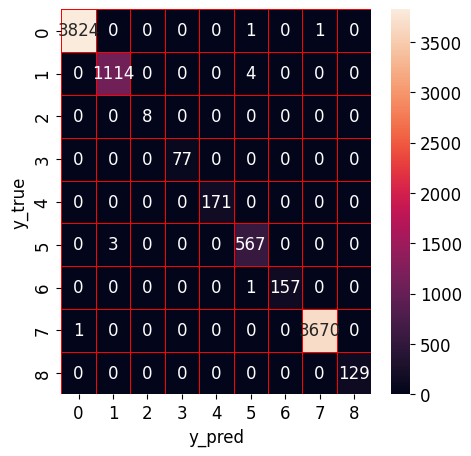

In [ ]:
# Ensemble method 2: confidence-based stacking

# Get the prediction probabilities of the top-3 models
top_3_train_proba = [globals()[model.lower() + '_prob_train'] for model in top_3_models]
top_3_test_proba = [globals()[model.lower() + '_prob_test'] for model in top_3_models]

# Stack the predictions and prediction probabilities of the top-3 models
X_train_balanced = np.concatenate(top_3_train_proba, axis=1)
x_test = np.concatenate(top_3_test_proba, axis=1)

# Train and evaluate the stacking model
stk = lgb.LGBMClassifier().fit(X_train_balanced, y_train_balanced)
y_predict=stk.predict(x_test)
y_true=y_test
stk_score=accuracy_score(y_true,y_predict)
print('Accuracy of Stacking: '+ str(stk_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of Stacking: '+(str(precision)))
print('Recall of Stacking: '+(str(recall)))
print('F1-score of Stacking: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009849 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6738
[LightGBM] [Info] Number of data points in the train set: 58346, number of used features: 30
[LightGBM] [Info] Start training from score -1.338277
[LightGBM] [Info] Start training from score -2.569226
[LightGBM] [Info] Start training from score -2.602441
[LightGBM] [Info] Start training from score -2.602441
[LightGBM] [Info] Start training from score -2.602441
[LightGBM] [Info] Start training from score -3.243093
[LightGBM] [Info] Start training from score -2.602441
[LightGBM] [Info] Start training from score -1.379905
[LightGBM] [Info] Start training from score -2.602441
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] 

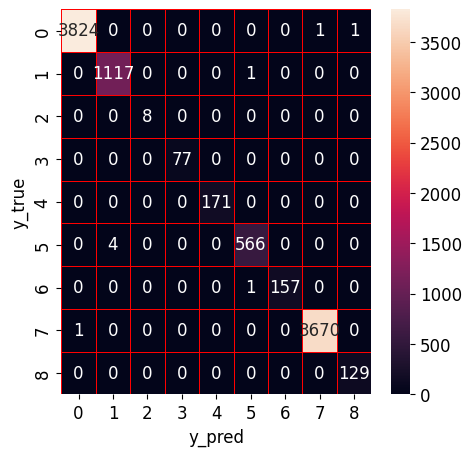

In [ ]:
# Ensemble method 3: hybrid stacking
# Get the predictions and prediction probabilities of the top-3 models
top_3_train_predictions = [globals()[model.lower() + '_train'] for model in top_3_models]
top_3_test_predictions = [globals()[model.lower() + '_test'] for model in top_3_models]

top_3_train_proba = [globals()[model.lower() + '_prob_train'] for model in top_3_models]
top_3_test_proba = [globals()[model.lower() + '_prob_test'] for model in top_3_models]

# Combine the predictions and prediction probabilities of the top-3 models
X_train_balanced = np.concatenate(top_3_train_predictions + top_3_train_proba, axis=1)
x_test = np.concatenate(top_3_test_predictions + top_3_test_proba, axis=1)

# Train and evaluate the stacking model
stk = lgb.LGBMClassifier().fit(X_train_balanced, y_train_balanced)
y_predict=stk.predict(x_test)
y_true=y_test
stk_score=accuracy_score(y_true,y_predict)
print('Accuracy of Stacking: '+ str(stk_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of Stacking: '+(str(precision)))
print('Recall of Stacking: '+(str(recall)))
print('F1-score of Stacking: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

# PS: the hyperparameter optimization process is the same as the previous steps